In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_PRAN = pd.read_csv('df_PRAN.csv')
df_PRIMEFIN = pd.read_csv('df_PRIMEFIN.csv')
df_FAREASTFIN = pd.read_csv('df_FAREASTFIN.csv')

In [3]:
df_PRAN.drop(columns="Unnamed: 0", inplace=True)
df_PRIMEFIN.drop(columns="Unnamed: 0", inplace=True)
df_FAREASTFIN.drop(columns="Unnamed: 0", inplace=True)


In [4]:
df_PRAN['date'] = pd.to_datetime(df_PRAN['date'])
df_PRIMEFIN['date'] = pd.to_datetime(df_PRIMEFIN['date'])
df_FAREASTFIN['date'] = pd.to_datetime(df_FAREASTFIN['date'])

In [5]:
df_PRAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      1213 non-null   datetime64[ns]
 1   trading_code              1213 non-null   object        
 2   last_traded_price         1213 non-null   float64       
 3   high                      1213 non-null   float64       
 4   low                       1213 non-null   float64       
 5   opening_price             1213 non-null   float64       
 6   closing_price             1213 non-null   float64       
 7   yesterdays_closing_price  1213 non-null   float64       
 8   trade                     1213 non-null   int64         
 9   value_mn                  1213 non-null   float64       
 10  volume                    1213 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 104.4+ KB


In [6]:
df_PRAN = df_PRAN.drop(df_PRAN[df_PRAN['date'] == '2020-01-01'].index)
df_PRIMEFIN = df_PRIMEFIN.drop(df_PRIMEFIN[df_PRIMEFIN['date'] == '2020-01-01'].index)
df_FAREASTFIN = df_FAREASTFIN.drop(df_FAREASTFIN[df_FAREASTFIN['date'] == '2020-01-01'].index)

In [7]:
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    """Helper function to plot our time series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

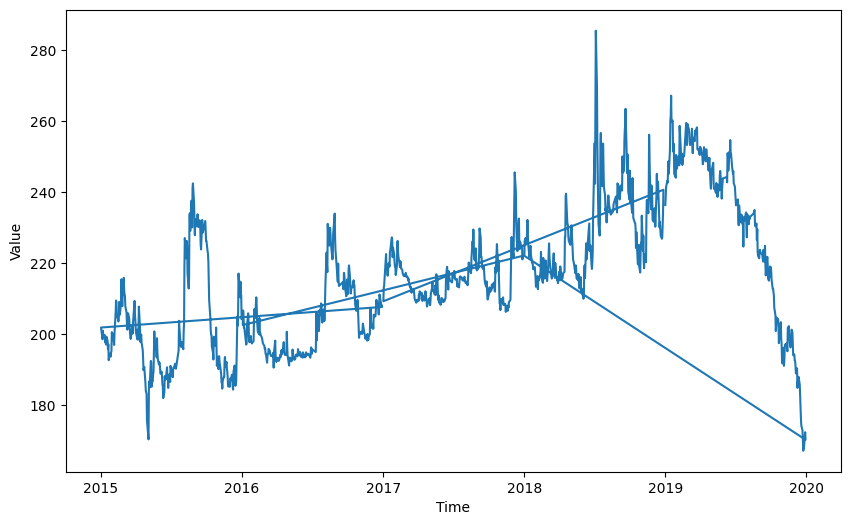

In [8]:
plt.figure(figsize=(10, 6))
plot_series(df_PRAN.date, df_PRAN.closing_price)
plt.show()

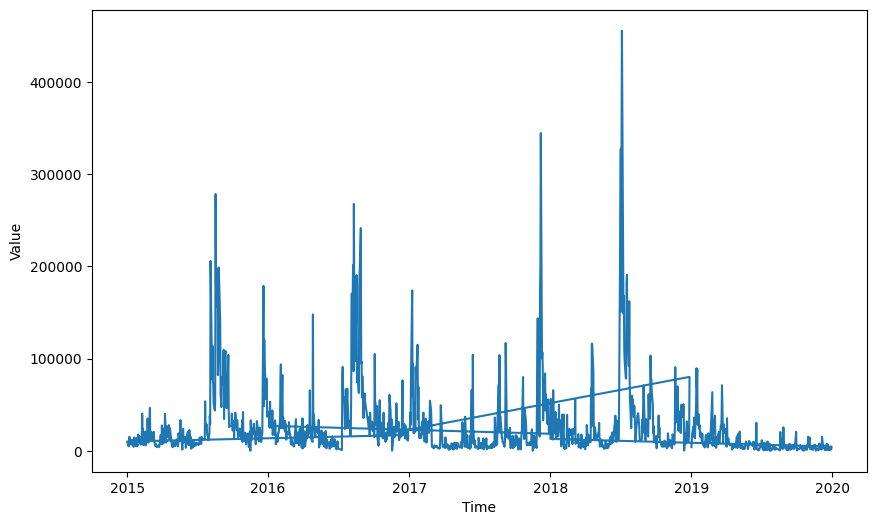

In [9]:
plt.figure(figsize=(10, 6))
plot_series(df_PRAN.date, df_PRAN.volume)
plt.show()

In [10]:
df = df_PRAN[['date','closing_price']]
df

,date,closing_price
0,2015-12-31,204.2
1,2015-12-30,210.9
2,2015-12-29,210.7
3,2015-12-28,214.7
4,2015-12-27,210.3
...,...,...
1207,2019-01-07,242.6
1208,2019-01-06,243.1
1209,2019-01-03,241.4
1210,2019-01-02,238.6


In [12]:
df.set_index('date', inplace=True)
df

,closing_price
date,
2015-12-31,204.2
2015-12-30,210.9
2015-12-29,210.7
2015-12-28,214.7
2015-12-27,210.3
...,...
2019-01-07,242.6
2019-01-06,243.1
2019-01-03,241.4


In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [23]:
training_set = df[:'2018'].iloc[:,0:1].values
test_set = df['2019':].iloc[:,0:1].values


In [38]:

print(len(training_set))
print(len(test_set))

975
237


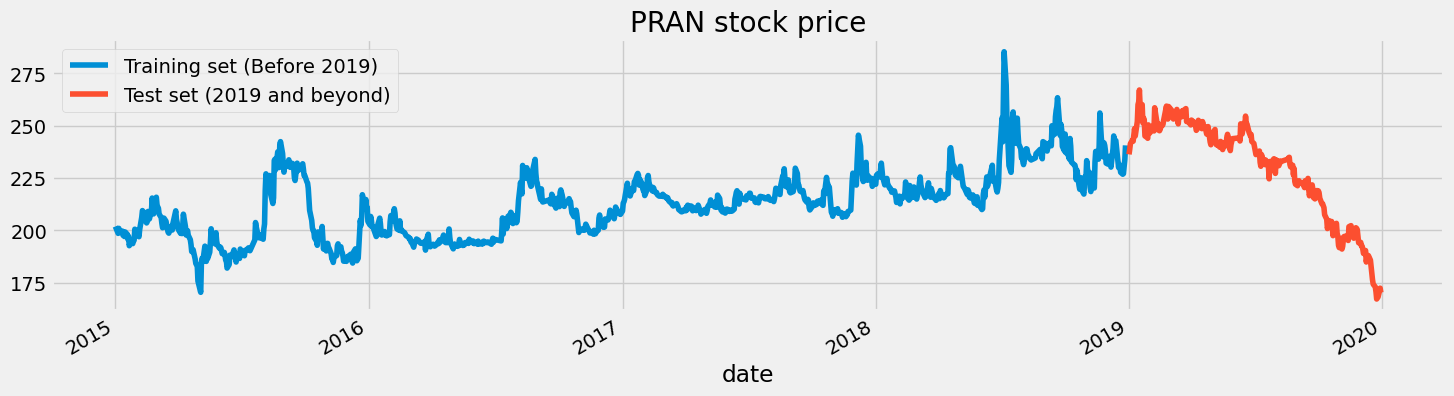

In [24]:
#We have chosen 'High' attribute for prices. Let's see what it looks like
df["closing_price"][:'2018'].plot(figsize=(16,4),legend=True)
df["closing_price"]['2019':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2019)','Test set (2019 and beyond)'])
plt.title('PRAN stock price')
plt.show()

In [25]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [34]:
X_train = []
y_train = []
for i in range(60,975):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [36]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
29/29 [==============================] - 11s 96ms/step - loss: 0.0222
Epoch 2/5
29/29 [==============================] - 2s 84ms/step - loss: 0.0134
Epoch 3/5
29/29 [==============================] - 2s 85ms/step - loss: 0.0119
Epoch 4/5
29/29 [==============================] - 2s 84ms/step - loss: 0.0104
Epoch 5/5
29/29 [==============================] - 2s 84ms/step - loss: 0.0105


In [37]:
dataset_total = pd.concat((df["closing_price"][:'2019'],df["closing_price"]['2019':]),axis=0)
inputs = dataset_total[len(df)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [39]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,273):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 2s 41ms/step


In [41]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Amazon Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Amazon Stock Price')
    plt.title('Amazon Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Amazon Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

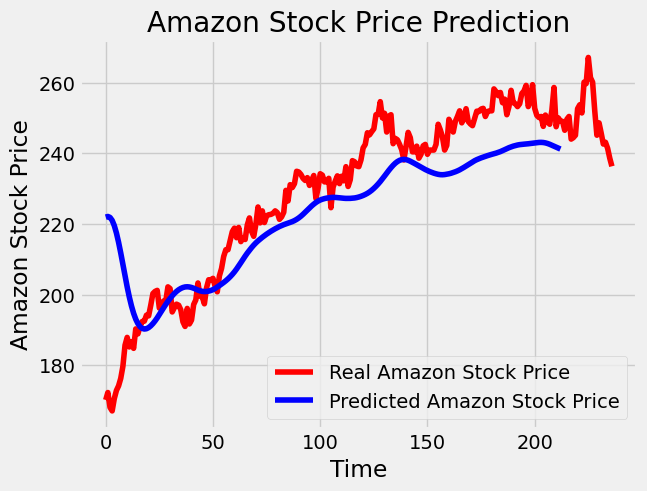

In [42]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)